In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


Reading Data

In [93]:
df = pd.read_csv('E:\\CodSoft\\CODSOFT\\Task_04_Sales_Prediction\\advertising.csv')


Exploring the Data

In [94]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [95]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [96]:
print(df.shape)

(200, 4)


In [97]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [98]:
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [99]:
print(df.nunique())

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64


In [100]:
df.isnull().sum()/len(df) *100

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [101]:
print(df.duplicated().sum())


0


Data Preprocessing

In [102]:
#Data containes no missing values
#Data containes no duplicated values

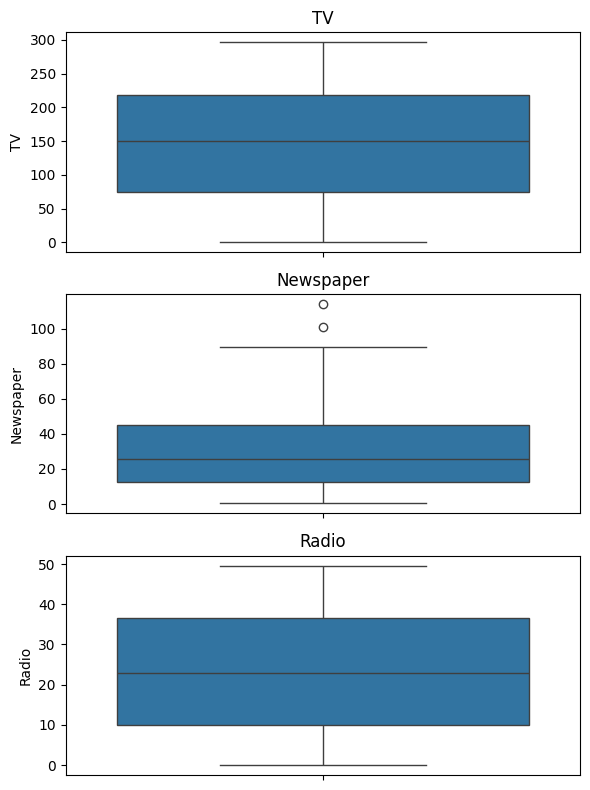

In [103]:
fig, ax = plt.subplots(3, figsize=(6, 8))


sns.boxplot(df['TV'], ax=ax[0])
ax[0].set_title('TV')


sns.boxplot(df['Newspaper'], ax=ax[1])
ax[1].set_title('Newspaper')


sns.boxplot(df['Radio'], ax=ax[2])
ax[2].set_title('Radio')

plt.tight_layout()  
plt.show()

Data Visualisation

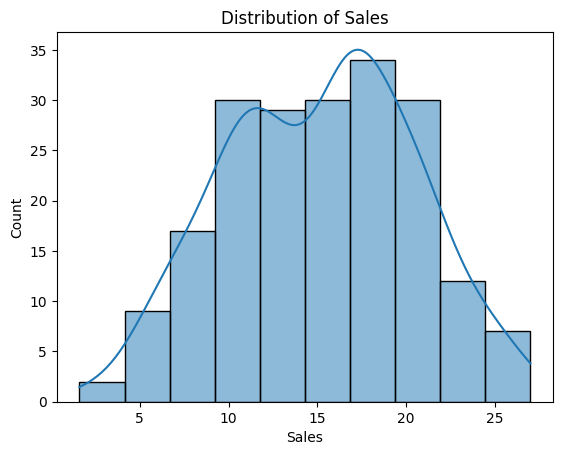

In [104]:
sns.histplot(data=df,x='Sales',kde=True)
plt.title('Distribution of Sales')
plt.show()

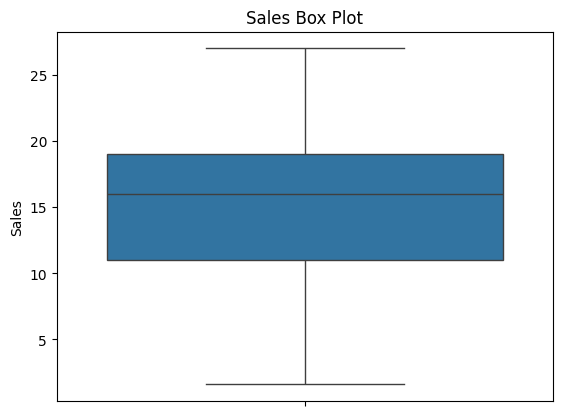

In [105]:
sns.boxplot(df['Sales'])
plt.title("Sales Box Plot")
plt.show()

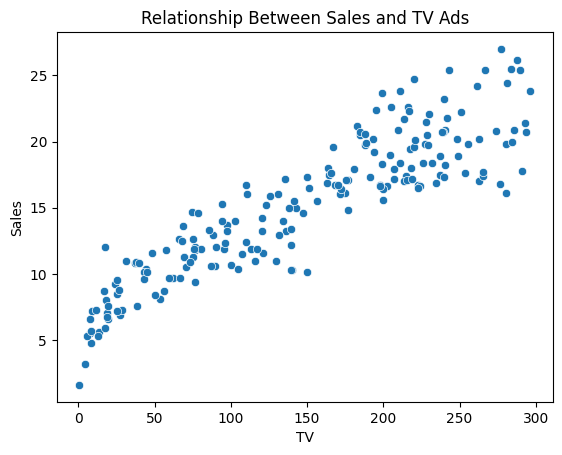

In [106]:
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title('Relationship Between Sales and TV Ads')
plt.show()

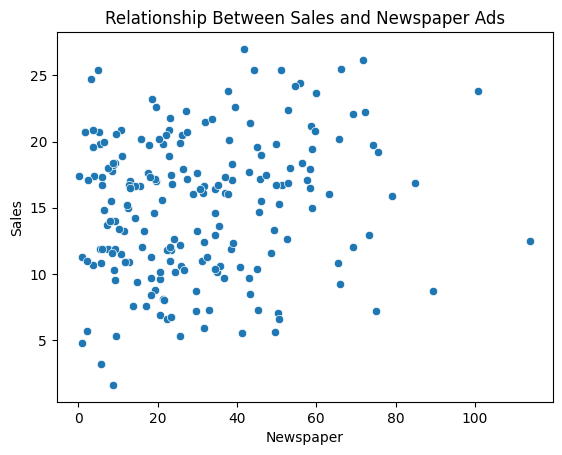

In [107]:
sns.scatterplot(data=df, x='Newspaper', y='Sales')
plt.title('Relationship Between Sales and Newspaper Ads')
plt.show()

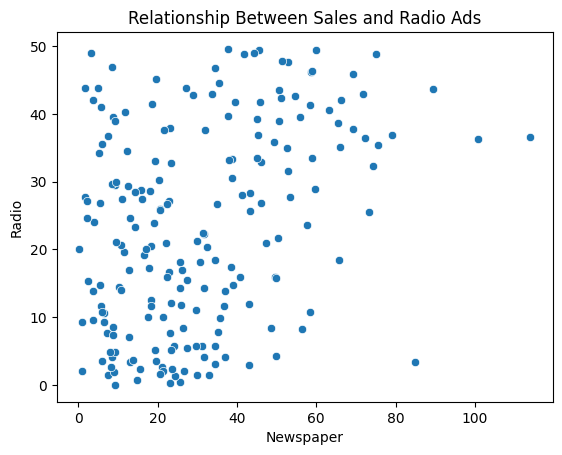

In [108]:
sns.scatterplot(data=df, x='Newspaper', y='Radio')
plt.title('Relationship Between Sales and Radio Ads')
plt.show()

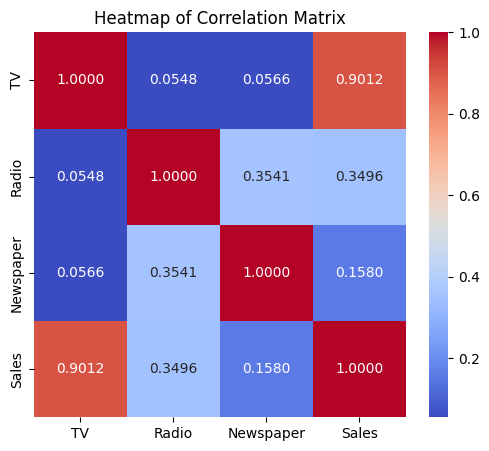

In [109]:
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


Model Selection and Building

In [110]:
#Newspaper does not affect the sales (Correlation = 0.15), so we drop it
df1=  df.drop('Newspaper',axis=1)
df1.head()

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,12.0
3,151.5,41.3,16.5
4,180.8,10.8,17.9


In [111]:
#I will drop the Radio feature for later comparison
df2 = df1.drop('Radio', axis = 1)
df2.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [112]:
x= df1.drop('Sales', axis=1)
y = df1['Sales']

x2= df2.drop('Sales', axis=1)
y2 = df2['Sales']

In [113]:
X_train, x_test, Y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
X_train2, x_test2, Y_train2, y_test2 = train_test_split(x2,y2,test_size=0.25,random_state=42)


1- Linear Regression

In [114]:

clf = LinearRegression() 

In [115]:
clf.fit(X_train,Y_train)


LinearRegression()

In [116]:
coefficients = clf.coef_
intercept = clf.intercept_

# Print the equation of the line
print("Linear Equation: y =", coefficients[0], "* x +", coefficients[1], "* x +", intercept)

Linear Equation: y = 0.05461316825103991 * x + 0.10204695772378572 * x + 4.8193142960357385


In [117]:
y_pred = clf.predict(x_test)
y_pred

array([16.96232854, 20.35836726, 23.70344018,  9.2238211 , 21.85089619,
       12.49240675, 21.13931062,  8.73371742, 17.31224257, 16.67813661,
        9.04998426,  8.47024201, 17.97306191,  8.16542944, 12.65214988,
       14.9104418 ,  8.08550994, 17.98857046, 11.00323911, 20.59077178,
       20.64915314, 12.25700576, 11.00710709, 22.24647217,  9.53665961,
        7.94521271, 20.8672449 , 13.90660952, 10.78573667,  8.05374216,
       15.9963474 , 10.69050817, 20.72299317, 10.20172889, 21.56768334,
       21.32838162, 12.25333734, 22.71609552, 12.72006789,  6.48445156,
       11.94020339, 15.43488178,  9.89779562,  9.50750635, 17.29757668,
        7.28311107, 10.3077553 , 15.30275627, 11.11351935, 11.79259037])

In [118]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.3563962909870844


In [119]:
print(f"R2 score : {r2_score(y_test,y_pred) *100} %")

R2 score : 91.33183876478476 %


In [120]:
clf.fit(X_train2,Y_train2)


LinearRegression()

In [121]:
coefficients = clf.coef_
intercept = clf.intercept_

# Print the equation of the line
print("Linear Equation: y =", coefficients[0], "* x +", intercept)

Linear Equation: y = 0.05538653085519158 * x + 7.098853680118275


In [122]:
y_pred2 = clf.predict(x_test2)
y_pred2

array([16.14347417, 17.92138181, 23.32156857,  7.74687609, 19.30050643,
       11.25838215, 19.10665357,  9.86818022, 19.41681814, 16.79703523,
        8.8435294 , 10.21157671, 20.08699517,  7.39794095, 14.82527473,
       16.52564123,  7.50317536, 18.04323218, 11.26945945, 20.24761611,
       19.81006251, 10.85406047,  9.20354185, 20.99533427, 10.92052431,
       10.06203308, 18.92387802, 14.81419743, 11.92855917,  7.56410054,
       18.16508254, 10.93160162, 18.11523467,  8.03488605, 22.64585289,
       20.29192533,  9.77402312, 22.25814718, 13.5901551 ,  8.62198328,
       13.52369126, 16.90226964,  9.48601316, 10.54943455, 19.50543659,
        9.21461916, 11.00914276, 15.25728968, 12.89228481, 11.32484598])

In [123]:
mse = mean_squared_error(y_test2, y_pred2)
print("Mean Squared Error:", mse)	

Mean Squared Error: 5.513351187165511


In [124]:
print(f"R2 score : {r2_score(y_test2,y_pred2) *100} %")

R2 score : 79.71876919875108 %


In [125]:
#Radio affect positivel our model, R2(with radio) > R2(without Radio)

2-Random Forest Regressor

In [126]:
from sklearn.ensemble import RandomForestRegressor



rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


rf_regressor.fit(X_train, Y_train)


y_pred = rf_regressor.predict(x_test)


r2 = r2_score(y_test, y_pred)*100
print("R2 score: {:.2f}".format(r2))


R2 score: 94.71


Thank You